<a href="https://colab.research.google.com/github/bhaarath-M/python_task/blob/main/credit%20card%20randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

In [5]:
x_train=pd.read_csv("/content/train_s3TEQDk.csv")
x_train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [6]:
x_train.shape

(245725, 11)

In [7]:
x_train.describe(include="all")

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
count,245725,245725,245725.000000,245725,245725,245725,245725.000000,216400,2.457250e+05,245725,245725.000000
unique,245725,2,NaN,35,4,4,NaN,2,NaN,2,NaN
top,HQJQV2NV,Male,NaN,RG268,Self_Employed,X1,NaN,No,NaN,No,NaN
freq,1,134197,NaN,35934,100886,103718,NaN,144357,NaN,150290,NaN
mean,NaN,NaN,43.856307,NaN,NaN,NaN,46.959141,NaN,1.128403e+06,NaN,0.237208
std,NaN,NaN,14.828672,NaN,NaN,NaN,32.353136,NaN,8.529364e+05,NaN,0.425372
min,NaN,NaN,23.000000,NaN,NaN,NaN,7.000000,NaN,2.079000e+04,NaN,0.000000
25%,NaN,NaN,30.000000,NaN,NaN,NaN,20.000000,NaN,6.043100e+05,NaN,0.000000
50%,NaN,NaN,43.000000,NaN,NaN,NaN,32.000000,NaN,8.946010e+05,NaN,0.000000
75%,NaN,NaN,54.000000,NaN,NaN,NaN,73.000000,NaN,1.366666e+06,NaN,0.000000


In [8]:
x_train.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [9]:
x_train["Is_Lead"].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [10]:
x_train=x_train.copy()
df=x_train.copy()
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [11]:
mode=df["Credit_Product"].mode()[0]
mode

'No'

In [12]:
df["Credit_Product"]=df["Credit_Product"].replace(np.NAN,mode)
df["Credit_Product"].isna().sum()

0

In [13]:
df["Credit_Product"].value_counts()

No     173682
Yes     72043
Name: Credit_Product, dtype: int64

In [14]:
df.isna().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [15]:
x=df.groupby(["Gender","Occupation"])["Is_Lead"].count()
x

Gender  Occupation   
Female  Entrepreneur       987
        Other            30423
        Salaried         39496
        Self_Employed    40622
Male    Entrepreneur      1680
        Other            39750
        Salaried         32503
        Self_Employed    60264
Name: Is_Lead, dtype: int64

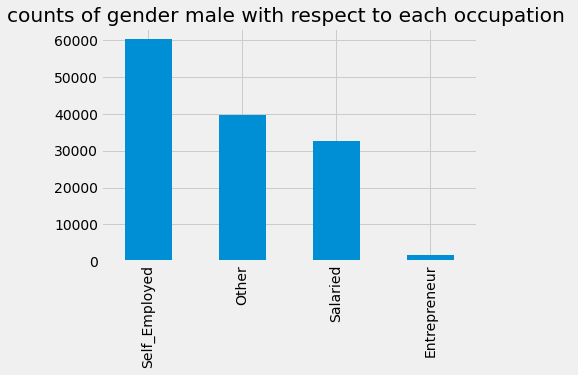

In [16]:
df.Occupation[df.Gender=="Male"].value_counts().plot(kind="bar")
plt.title("counts of gender male with respect to each occupation ")
plt.show()

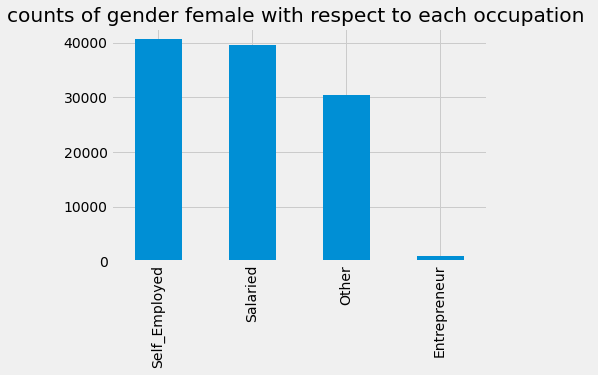

In [17]:
df.Occupation[df.Gender=="Female"].value_counts().plot(kind="bar")
plt.title("counts of gender female with respect to each occupation ")
plt.show()

In [18]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


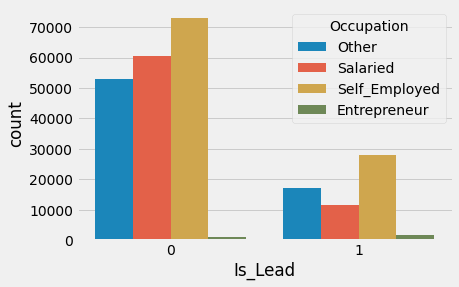

In [19]:
sns.countplot(x="Is_Lead",data=df,hue="Occupation")

In [20]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['ID', 'Gender', 'Region_Code', 'Occupation', 'Channel_Code',
       'Credit_Product', 'Is_Active'],
      dtype='object')


In [21]:
l1=['Gender','Credit_Product', 'Is_Active']

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in l1:
    df[i] = le.fit_transform(df[i].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  int64 
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       245725 non-null  int64 
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  int64 
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 20.6+ MB
None


In [23]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,0,73,RG268,Other,X3,43,0,1045696,0,0
1,IDD62UNG,0,30,RG277,Salaried,X1,32,0,581988,0,0
2,HD3DSEMC,0,56,RG268,Self_Employed,X3,26,0,1484315,1,0
3,BF3NC7KV,1,34,RG270,Salaried,X1,19,0,470454,0,0
4,TEASRWXV,0,30,RG282,Salaried,X1,33,0,886787,0,0


In [24]:
cat_col=["Occupation","Channel_Code"]
df=pd.get_dummies(df,columns=cat_col)

In [25]:
df.head()

,ID,Gender,Age,Region_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,NNVBBKZB,0,73,RG268,43,0,1045696,0,0,0,1,0,0,0,0,1,0
1,IDD62UNG,0,30,RG277,32,0,581988,0,0,0,0,1,0,1,0,0,0
2,HD3DSEMC,0,56,RG268,26,0,1484315,1,0,0,0,0,1,0,0,1,0
3,BF3NC7KV,1,34,RG270,19,0,470454,0,0,0,0,1,0,1,0,0,0
4,TEASRWXV,0,30,RG282,33,0,886787,0,0,0,0,1,0,1,0,0,0


In [26]:
df.Region_Code.value_counts()

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

In [27]:
top_10=[x for x in df.Region_Code.value_counts().head(10).index]
top_10

['RG268',
 'RG283',
 'RG254',
 'RG284',
 'RG277',
 'RG280',
 'RG269',
 'RG270',
 'RG261',
 'RG257']

In [28]:
for label in top_10:
   df["Region_Code"+"_"+label]=np.where(df["Region_Code"]==label,1,0)
   

In [29]:
df.head()

,ID,Gender,Age,Region_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Region_Code_RG268,Region_Code_RG283,Region_Code_RG254,Region_Code_RG284,Region_Code_RG277,Region_Code_RG280,Region_Code_RG269,Region_Code_RG270,Region_Code_RG261,Region_Code_RG257
0,NNVBBKZB,0,73,RG268,43,0,1045696,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,IDD62UNG,0,30,RG277,32,0,581988,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,HD3DSEMC,0,56,RG268,26,0,1484315,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,BF3NC7KV,1,34,RG270,19,0,470454,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,TEASRWXV,0,30,RG282,33,0,886787,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
df=df.drop(["Region_Code","ID"],axis=1)

In [31]:
df.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Region_Code_RG268,Region_Code_RG283,Region_Code_RG254,Region_Code_RG284,Region_Code_RG277,Region_Code_RG280,Region_Code_RG269,Region_Code_RG270,Region_Code_RG261,Region_Code_RG257
0,0,73,43,0,1045696,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,0,30,32,0,581988,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,56,26,0,1484315,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,1,34,19,0,470454,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,30,33,0,886787,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
df.Is_Lead.value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [33]:
x=df.drop("Is_Lead",1)
y=df["Is_Lead"]

In [34]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(sampling_strategy="minority")
X,Y=os.fit_sample(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [35]:
Counter(Y)

Counter({0: 187437, 1: 187437})

In [36]:
test=pd.read_csv("/content/test_mSzZ8RL.csv")


In [37]:
df_test=test.copy()
df_test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [38]:
test_l1=['Gender','Credit_Product', 'Is_Active']

In [39]:
le1 = LabelEncoder()

for i in test_l1:
    df_test[i] = le1.fit_transform(df_test[i].astype(str))

print (df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  int64 
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       105312 non-null  int64 
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 8.0+ MB
None


In [40]:
cat_col=["Occupation","Channel_Code"]
df_test=pd.get_dummies(df_test,columns=cat_col)

In [41]:
df_test.Region_Code.value_counts()

RG268    15125
RG283    12881
RG254    11737
RG284     8173
RG277     5596
RG280     5529
RG270     3440
RG269     3288
RG261     3286
RG251     2678
RG257     2588
RG272     2338
RG282     2337
RG274     2208
RG281     2144
RG252     1811
RG273     1803
RG263     1615
RG279     1600
RG275     1383
RG260     1300
RG264     1241
RG256     1194
RG276     1185
RG259     1102
RG250     1048
RG255      891
RG278      824
RG258      812
RG253      810
RG262      800
RG265      668
RG271      654
RG266      631
RG267      592
Name: Region_Code, dtype: int64

In [42]:
top_10_test=[x for x in df_test.Region_Code.value_counts().head(10).index]
top_10_test

['RG268',
 'RG283',
 'RG254',
 'RG284',
 'RG277',
 'RG280',
 'RG270',
 'RG269',
 'RG261',
 'RG251']

In [43]:
for label in top_10_test:
   df_test["Region_Code"+"_"+label]=np.where(df_test["Region_Code"]==label,1,0)
   

In [44]:
df_test=df_test.drop(["Region_Code","ID"],axis=1)
df_test.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Region_Code_RG268,Region_Code_RG283,Region_Code_RG254,Region_Code_RG284,Region_Code_RG277,Region_Code_RG280,Region_Code_RG270,Region_Code_RG269,Region_Code_RG261,Region_Code_RG251
0,1,29,25,1,742366,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,43,49,2,925537,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,1,31,14,0,215949,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,29,33,0,868070,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,29,19,0,657087,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
Y_pred_train=rfc.predict(X)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [48]:
confusion_matrix(Y,Y_pred_train)

array([[187436,      1],
       [     1, 187436]])

In [49]:
print(classification_report(Y,Y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    187437
           1       1.00      1.00      1.00    187437

    accuracy                           1.00    374874
   macro avg       1.00      1.00      1.00    374874
weighted avg       1.00      1.00      1.00    374874



In [50]:
Y_pred_test=rfc.predict(df_test)

In [51]:
rfc.score(X,Y)

0.9999946648740643

In [52]:
Submission = pd.DataFrame()
Submission["ID"]=test["ID"]
Submission["Is_Lead"]=Y_pred_test

Submission

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0
...,...,...
105307,DBENJOYI,1
105308,CWQ72DWS,1
105309,HDESC8GU,1
105310,2PW4SFCA,0


In [53]:
Submission.to_csv("Randomforest.csv",index=False)

In [54]:
x1=df.drop("Is_Lead",1)
y1=df["Is_Lead"]

In [55]:
from collections import Counter
from imblearn.under_sampling import NearMiss
nm=NearMiss(random_state=5)
X1,Y1=nm.fit_sample(x1,y1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [56]:
Counter(Y1)

Counter({0: 58288, 1: 58288})

In [64]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X1,Y1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
Y_pred1_train=RF.predict(X1)

In [66]:
confusion_matrix(Y1,Y_pred1_train)

array([[58286,     2],
       [    2, 58286]])

In [68]:
Y_pred1_test=RF.predict(df_test)

In [69]:
Submission1 = pd.DataFrame()
Submission1["ID"]=test["ID"]
Submission1["Is_Lead"]=Y_pred1_test

Submission1

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,1
3,TT8RPZVC,0
4,SHQZEYTZ,0
...,...,...
105307,DBENJOYI,1
105308,CWQ72DWS,1
105309,HDESC8GU,1
105310,2PW4SFCA,0


In [76]:
Submission1.to_csv("Randomforest2.csv",index=False)